In [1]:
import warnings
warnings.filterwarnings('ignore')

!pip install scikit-image

In [2]:
import numpy as np
import tensorflow as tf
import vgg16
import utils

In [3]:
from skimage import io
import matplotlib.pyplot as plt

#### Image Load 및 data 준비하기

In [4]:
fn1 ="./test_data/mouse.jpeg"
#fn2 ="./test_data/computer.jpg"
#fn2 = "./test_data/IMG_0358s.jpg"

In [6]:
i1 = io.imread(fn1)
#i2 = io.imread(fn2)

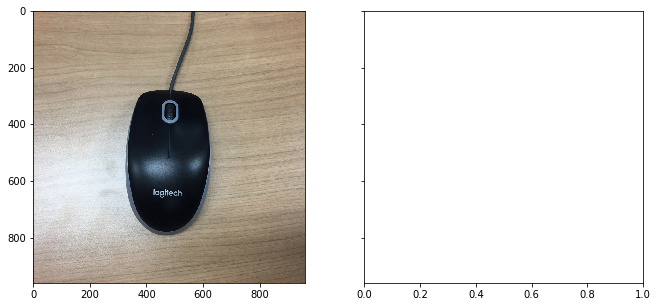

In [8]:
f, axarr = plt.subplots(1,2, sharey=True, figsize=(11,5))
axarr[0].imshow(i1)
#axarr[1].imshow(i2)

In [10]:
img1 = utils.load_image(fn1)
#img2 = utils.load_image(fn2)

# Just in case of using four-channel images
img1 = img1[:, :, :3]
#img2 = img2[:, :, :3]

print(img1.shape)
#print(img2.shape)

(224, 224, 3)


In [12]:
img1r = img1.reshape((1, 224, 224, 3))
#img2r = img2.reshape((1, 224, 224, 3))

print(img1r.shape)
#print(img2r.shape)

(1, 224, 224, 3)


In [14]:
batch = np.concatenate((img1r), 0)
print(batch.shape)

(224, 224, 3)


#### VGG model 

In [15]:
# !wget https://www.dropbox.com/s/8a8rei66f72um4i/vgg16.npy
vgg = vgg16.Vgg16('vgg16.npy')
#print(vgg.data_dict)

npy file loaded


#### Tensorflow

In [16]:
images = tf.placeholder("float", [2, 224, 224, 3])

In [17]:
vgg.build(images)

build model started
build model finished: 15s


* Students : vgg16.py 를 열어서 build 함수 이해하기

In [18]:
# initialize
sess = tf.InteractiveSession()

In [19]:
feed_dict = {images: batch}
prob = sess.run(vgg.prob, feed_dict=feed_dict)

ValueError: Cannot feed value of shape (224, 224, 3) for Tensor 'Placeholder:0', which has shape '(2, 224, 224, 3)'

#### 예측 결과 출력하기

In [ ]:
print(prob[0])

In [ ]:
print(prob[0].shape)

In [ ]:
print(np.argmax(prob[0]))

In [ ]:
# returns the top1 string
def print_prob(prob, file_path):
    synset = [l.strip() for l in open(file_path).readlines()]

    # print prob
    pred = np.argsort(prob)[::-1]

    # Get top1 label
    top1 = synset[pred[0]]
    print(("Top1: ", top1, prob[pred[0]]))
    # Get top5 label
    top5 = [(synset[pred[i]], prob[pred[i]]) for i in range(5)]
    print(("Top5: ", top5))
    return top1

In [ ]:
!cat synset.txt # Linux or Mac users
#!type synset.txt # Windows users

In [ ]:
top1 = print_prob(prob[0], 'synset.txt')

In [ ]:
print("Top1: {}".format(top1))

In [ ]:
print_prob(prob[1], 'synset.txt')